In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import time
import utils

import os

root = '../../dataset'
t_path = ['dataset_1790789260.csv',
          'dataset_1095394822.csv',
          'dataset_479911147.csv',
          'dataset_665254893.csv',
          
        ] 

s_path = ['dataset_320725673.csv',
          'dataset_401881001.csv',
          'dataset_1992961554.csv',
          'dataset_852552682.csv',
         ] 

l_path = ['dataset_327382690.csv',
          'dataset_395223984.csv',
          'dataset_1999618571.csv',
         ]

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

<IPython.core.display.Javascript object>


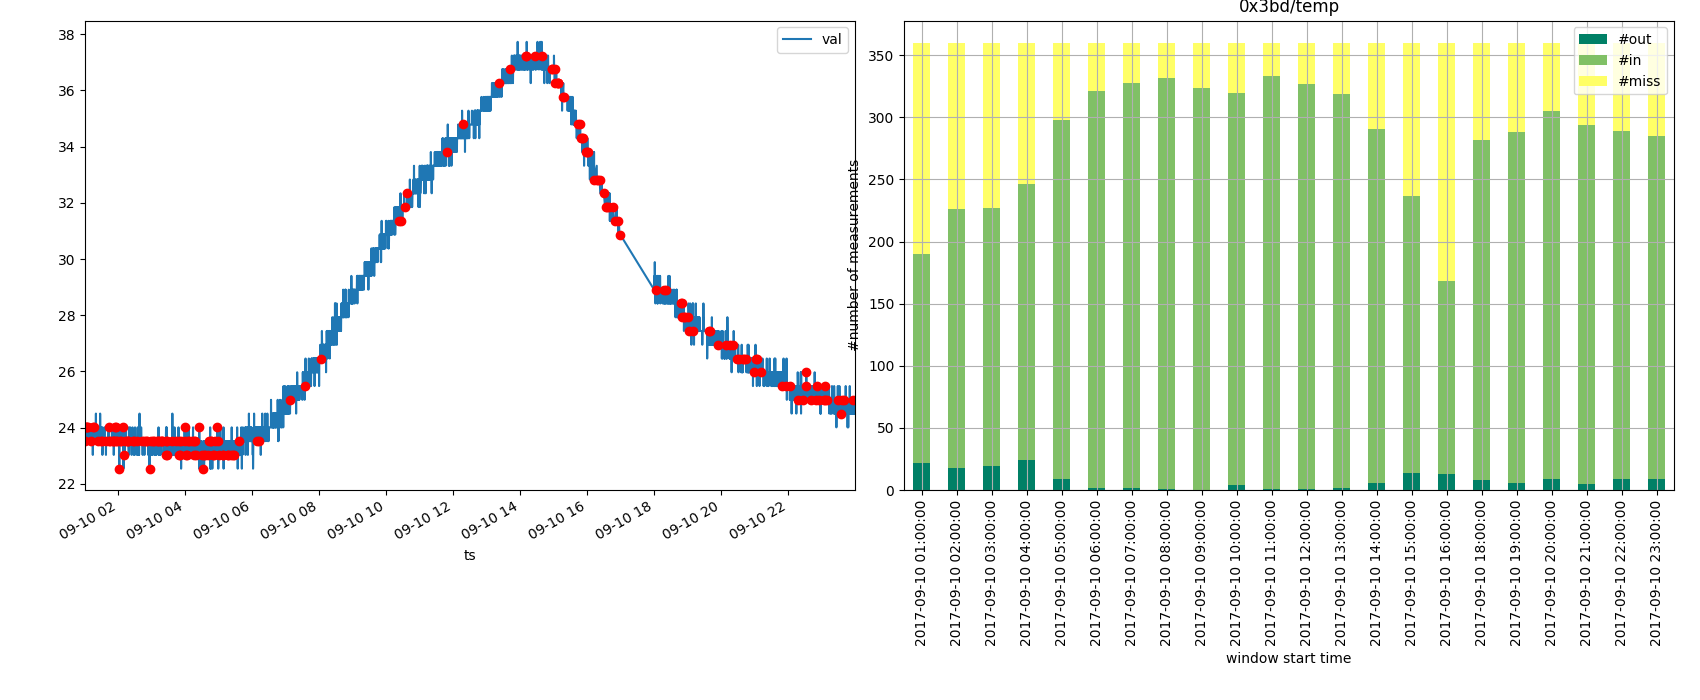

<IPython.core.display.Javascript object>


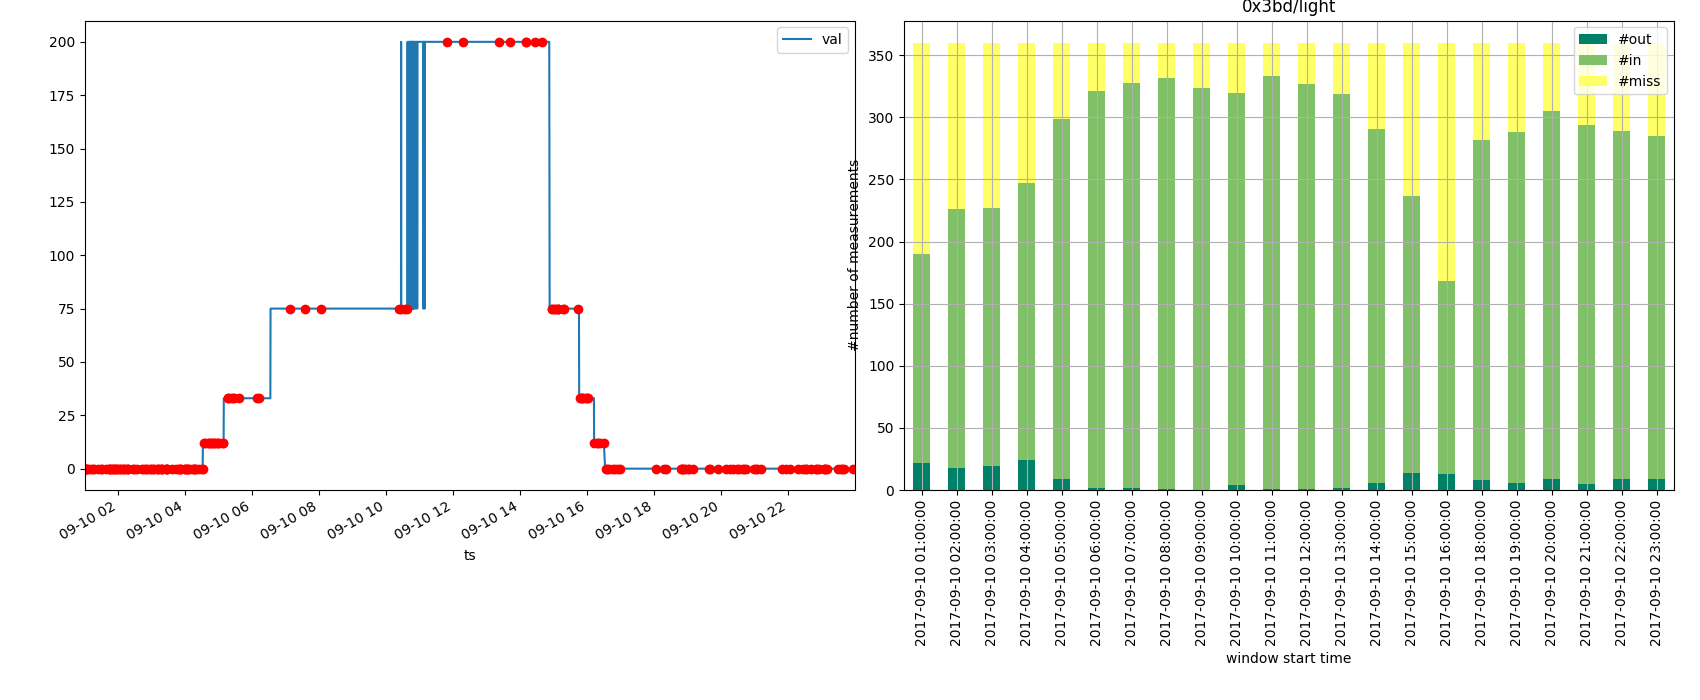

<IPython.core.display.Javascript object>


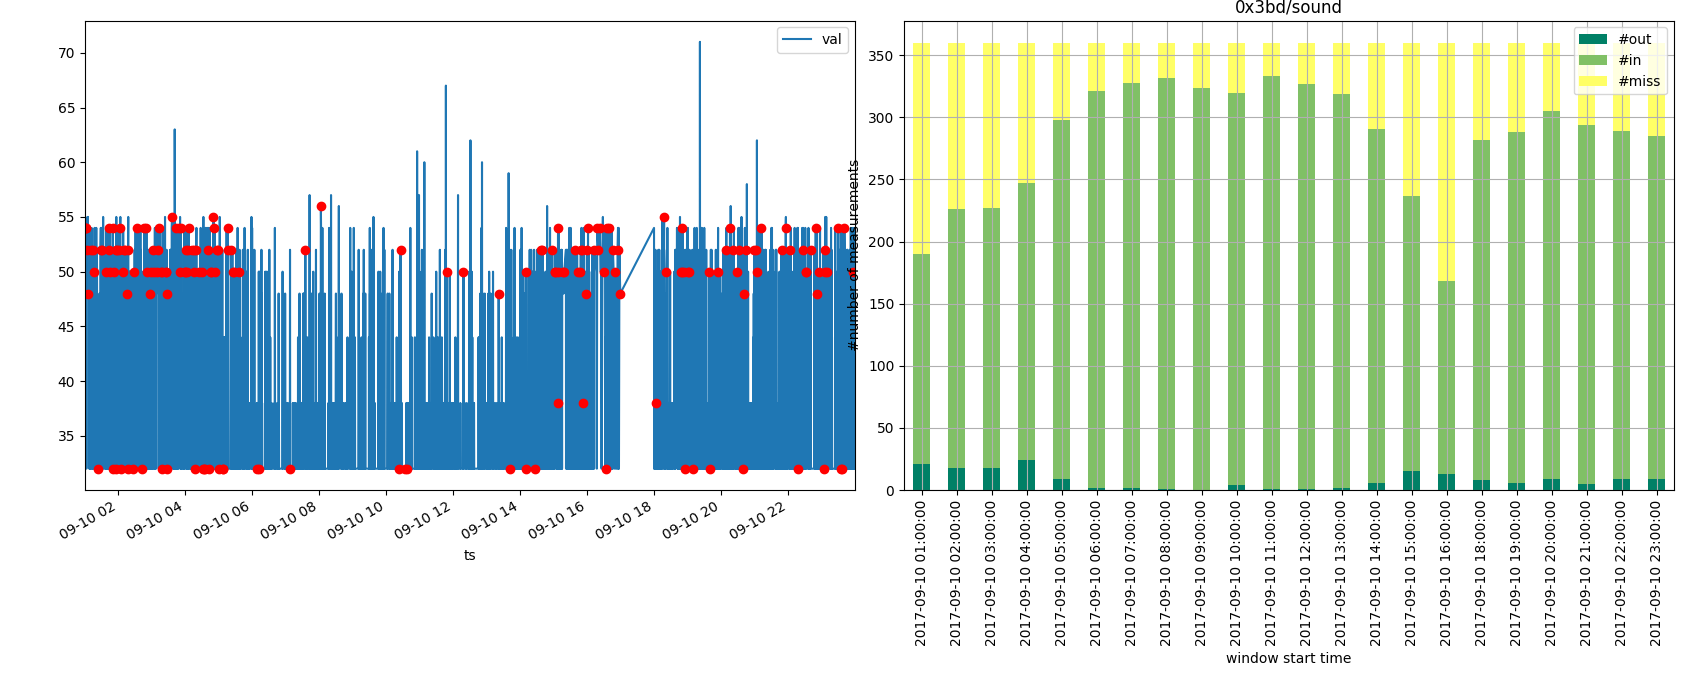

In [3]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
import math

def KNN_slider(df, mins = 60, val_index = 2, ts_index = 1, tr_secs = 10):
    
    delta = np.timedelta64(mins,'m')
    tr = np.timedelta64(tr_secs, 's')
    expected_num_measurements = int(delta / tr)
    
    win_col = ['id', 'start', 'stop', '#out', '#in', '#miss']
    win_ret = pd.DataFrame(columns = win_col)
    
    point_col = ['id', 'ts', 'val', 'is_in']
    point_ret = pd.DataFrame(columns = point_col)
    
    gen = utils.windows_generator(df, delta, ts_index)
    
    name = df.iloc[0,0]
    prev_window = pd.DataFrame()
    
    root = 1
    model = LocalOutlierFactor(n_neighbors=root, algorithm='auto', metric = 'euclidean', contamination='auto', n_jobs=1)
    
    for start, end, window in gen:
        if len(window) == 0:
            continue
        
        if len(prev_window) + len(window) < expected_num_measurements:
            prev_window = prev_window.append(window)
            continue
        
        curr_data = prev_window.append(window) 
        to_fit = curr_data.iloc[:,1:3].values.reshape(-1,2)
        x = model.fit_predict(to_fit)
        
        n_out = 0
        n_in = 0
        # count outliers
        j = len(prev_window.values)
        for i in range(len(window)):
            frame = window.iloc[i,:]
            
            ts = frame[ts_index].astype('datetime64[ms]')
            value = frame[val_index]
            out = x[j]
            if out == -1:
                n_out += 1
            else:
                n_in += 1
            
            j+=1
            
            new_data = pd.DataFrame([[name, ts, value, out]], columns = point_col)
            point_ret = point_ret.append(new_data, sort = False)
            
            prev_window = prev_window.append(frame)
            prev_window = prev_window.iloc[1:,:]
        
        win_data = pd.DataFrame([[name, start, end, n_out, n_in, expected_num_measurements-n_in-n_out]], columns = win_col)
        win_ret = win_ret.append(win_data, sort = False)
            
        
    return win_ret, point_ret


for x in [t_path[0], l_path[0], s_path[0]]:
    path = os.path.join(root, x)
    df = pd.read_csv(path, header=None)
    
    name = df.iloc[0,0].split('/')
    name = name[-2]+'/'+name[-1]
    
    gen = utils.windows_generator(df, np.timedelta64(1,'D'))
    i = 1
    for start, end, df in gen:
        if i%2 == 0:
            break
        i += 1
        
    y, x = KNN_slider(df)
    fig, ax = plt.subplots(nrows = 1, ncols = 2)
    x.plot(ax = ax[0], x = 1, y = [2], kind='line')
    for l in x.values:
        ts = l[1]
        val = l[2]
        boolean = l[3]
        if boolean == -1:
            ax[0].plot(ts, val, 'ro-')
    ax[0].xaxis_date()

    fig.tight_layout()
    fig.subplots_adjust(left = 0.05, bottom=0.3)

    y.plot(x = 1, y = [3,4,5], ax = ax[1], kind = 'bar', stacked = 'True', colormap = 'summer', title = name)

    ax[1].set_xlabel('window start time')
    ax[1].set_ylabel('#number of measurements')
    ax[1].xaxis_date()
    ax[1].legend()
    ax[1].grid()

<IPython.core.display.Javascript object>


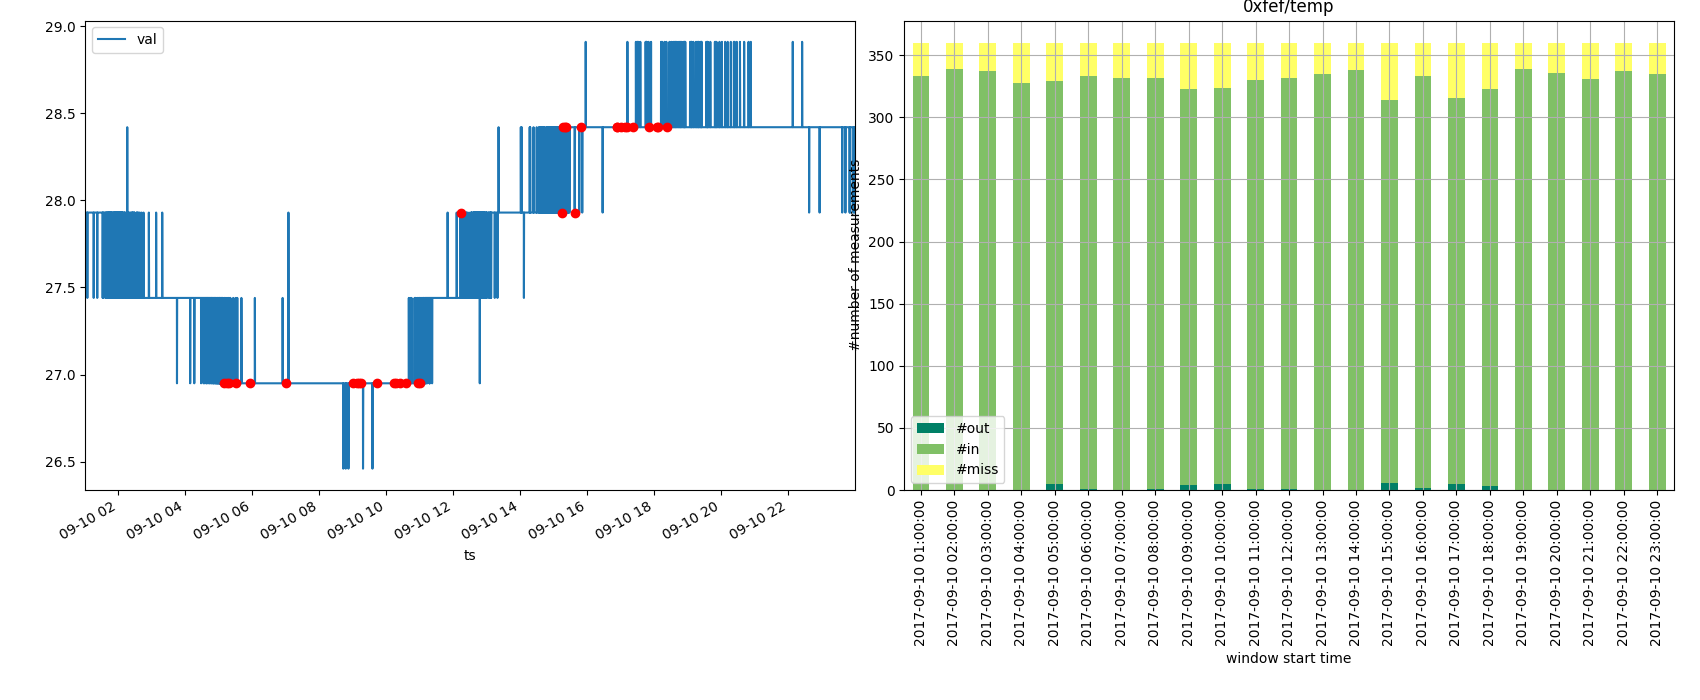

<IPython.core.display.Javascript object>


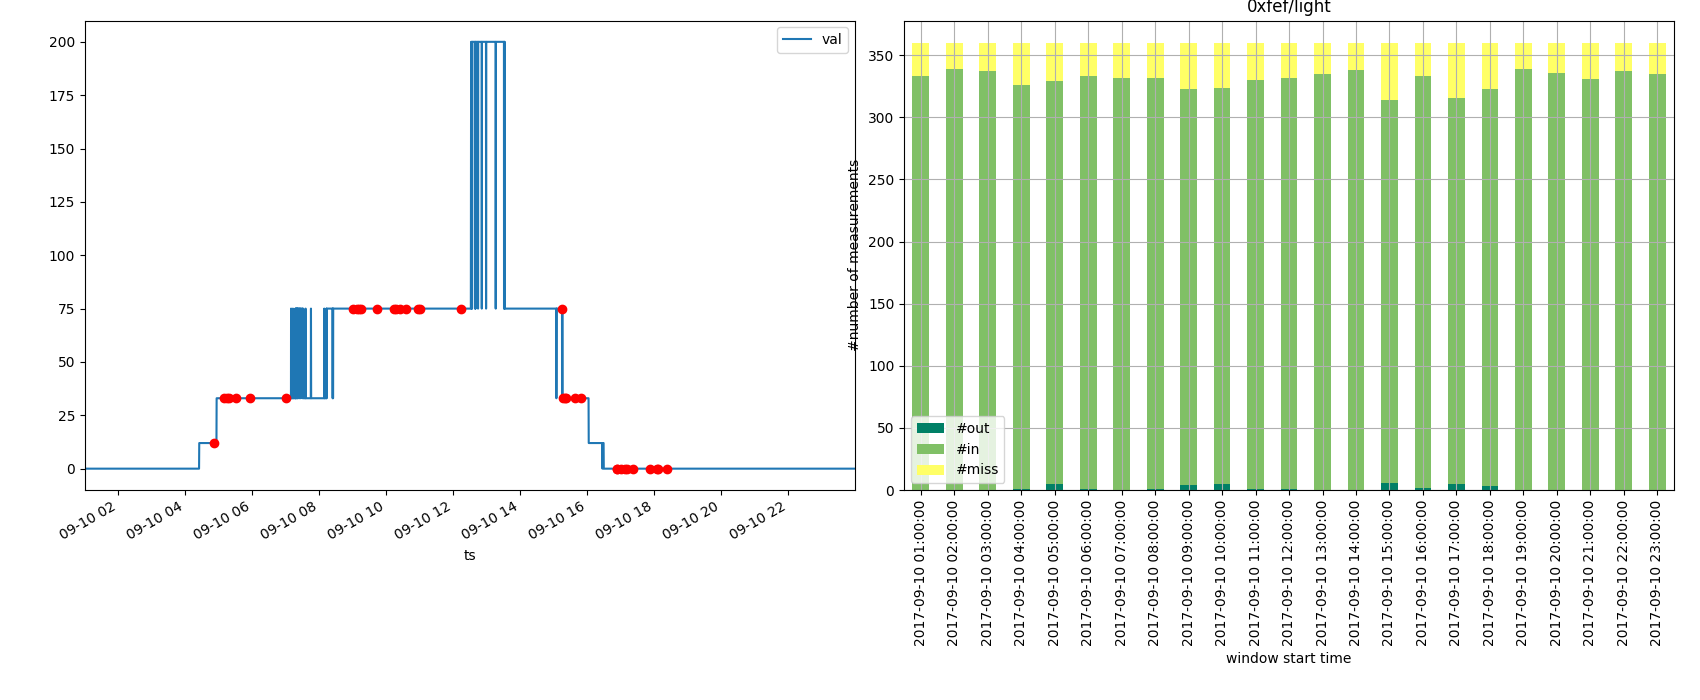

<IPython.core.display.Javascript object>


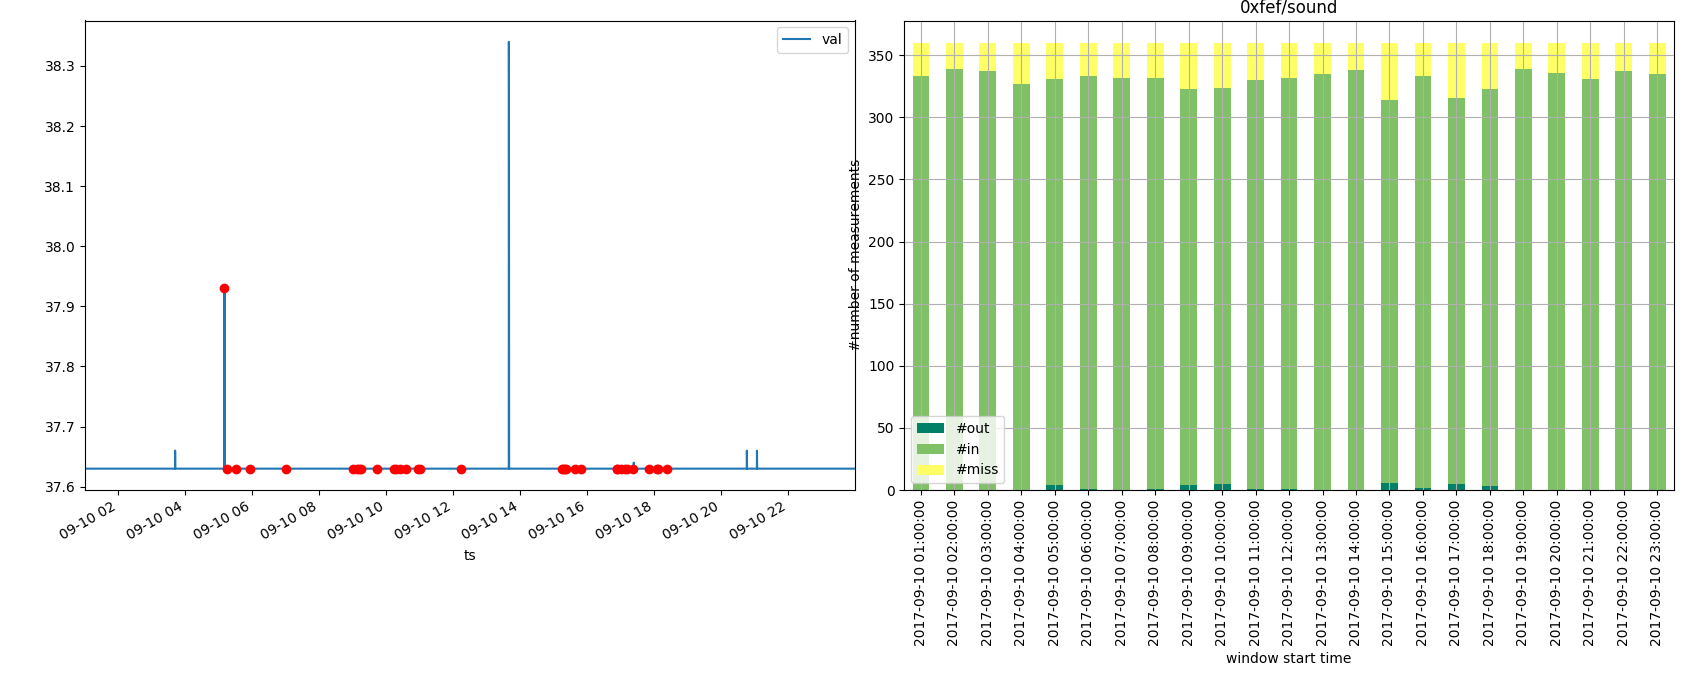

In [4]:
for x in [t_path[1], l_path[1], s_path[1]]:
    path = os.path.join(root, x)
    df = pd.read_csv(path, header=None)
    
    name = df.iloc[0,0].split('/')
    name = name[-2]+'/'+name[-1]
    
    gen = utils.windows_generator(df, np.timedelta64(1,'D'))
    i = 1
    for start, end, df in gen:
        if i%2 == 0:
            break
        i += 1
        
    y, x = KNN_slider(df)
    fig, ax = plt.subplots(nrows = 1, ncols = 2)
    x.plot(ax = ax[0], x = 1, y = [2], kind='line')
    for l in x.values:
        ts = l[1]
        val = l[2]
        boolean = l[3]
        if boolean == -1:
            ax[0].plot(ts, val, 'ro-')
    ax[0].xaxis_date()

    fig.tight_layout()
    fig.subplots_adjust(left = 0.05, bottom=0.3)

    y.plot(x = 1, y = [3,4,5], ax = ax[1], kind = 'bar', stacked = 'True', colormap = 'summer', title = name)

    ax[1].set_xlabel('window start time')
    ax[1].set_ylabel('#number of measurements')
    ax[1].xaxis_date()
    ax[1].legend()
    ax[1].grid()